In [1]:
import pandas as pd
import numpy as np
from os import listdir,path
import warnings
import math
import csv
import argparse
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
from sys import exit

In [2]:
ifc = 192
fcount = 1691383040
tgap = 1
instrument_type = 'BM'

In [3]:
if instrument_type == 'EP':
      count_tp = 1
else:
     count_tp = 13
 
print(count_tp)

13


In [4]:
exp_name = str(fcount) + '_' + str(ifc)

print(exp_name)

1691383040_192


In [5]:
time_assign = {}
for cycle in range(1,38):
      tpoint = "t" + str(cycle)
      time_assign[tpoint] = tgap + 3 + (cycle-1) * 5
 
print(time_assign)

{'t1': 4, 't2': 9, 't3': 14, 't4': 19, 't5': 24, 't6': 29, 't7': 34, 't8': 39, 't9': 44, 't10': 49, 't11': 54, 't12': 59, 't13': 64, 't14': 69, 't15': 74, 't16': 79, 't17': 84, 't18': 89, 't19': 94, 't20': 99, 't21': 104, 't22': 109, 't23': 114, 't24': 119, 't25': 124, 't26': 129, 't27': 134, 't28': 139, 't29': 144, 't30': 149, 't31': 154, 't32': 159, 't33': 164, 't34': 169, 't35': 174, 't36': 179, 't37': 184}


In [6]:
def gettime(tname):
      realt = time_assign[tname]
      return (realt) 
 
print(gettime('t1'))

4


In [7]:
layout_file = '192_assignment.xlsx'
#print(layout_file)

In [8]:
csv_file = '1691383040.csv'
#print(csv_file)

In [9]:
out_folder = 'output'
#print(out_folder)

In [10]:
if path.exists(layout_file) == False:
      raise Exception((layout_file + " doesn't exist"))
 
print(path.exists(layout_file))

True


In [11]:
if path.exists(csv_file) == False:
      raise Exception((csv_file + " doesn't exist"))
 
print(path.exists(csv_file))

True


In [12]:
probe_df = pd.read_csv(csv_file, sep=",", header = 9238, nrows = 4608, skip_blank_lines=False)
print(probe_df)

     Chamber ID      1      2      3      4      5      6      7      8  \
0      S012-A02   4577   4496   4513   4541   4556   4575   4592   4614   
1      S011-A02   4688   4617   4642   4669   4684   4721   4739   4770   
2      S010-A02  22540  22167  22078  22069  21988  21981  21904  21926   
3      S007-A02   5089   4982   5005   5027   5047   5077   5091   5126   
4      S008-A02   4882   4792   4820   4845   4864   4891   4912   4944   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
4603   S185-A13   4010   3949   3976   4000   4012   4045   4065   4087   
4604   S186-A13   3881   3814   3815   3822   3827   3841   3844   3847   
4605   S183-A13   4077   3998   3843   3766   3680   3647   3639   3645   
4606   S182-A13   3903   3850   3863   3884   3897   3916   3936   3952   
4607   S181-A13   3896   3846   3858   3882   3902   3921   3942   3969   

          9     10     11     12     13  Unnamed: 14  
0      4627   4651   4657   4686   4693     

In [13]:
reference_df = pd.read_csv(csv_file, sep=",", header = 4627, nrows = 4608, skip_blank_lines=False)
print(reference_df)

     Chamber ID      1      2      3      4      5      6      7      8  \
0      S012-A02  16687  16451  16349  16399  16336  16393  16338  16375   
1      S011-A02  18086  17872  17771  17851  17787  17871  17809  17877   
2      S010-A02  17914  17672  17606  17659  17625  17702  17646  17695   
3      S007-A02  17807  17680  17598  17655  17597  17652  17605  17667   
4      S008-A02  18900  18752  18653  18709  18653  18725  18660  18721   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
4603   S185-A13  13681  13546  13455  13502  13456  13525  13492  13536   
4604   S186-A13  16576  16367  16263  16300  16262  16329  16299  16378   
4605   S183-A13   3232   3235   3081   2983   2899   2867   2868   2874   
4606   S182-A13  13866  13706  13617  13612  13565  13614  13559  13623   
4607   S181-A13  13250  13072  12996  13033  13008  13074  13028  13068   

          9     10     11     12     13  Unnamed: 14  
0     16315  16344  16259  16294  16182     

In [14]:
bkgd_ref_df = pd.read_csv(csv_file, sep=",", header = 13849, nrows = 4608, skip_blank_lines=False)
print(bkgd_ref_df)

     Chamber ID     1     2     3     4     5     6     7     8     9    10  \
0      S012-A02  2401  2388  2385  2378  2380  2385  2383  2377  2383  2380   
1      S011-A02  2451  2438  2429  2433  2429  2431  2439  2429  2426  2433   
2      S010-A02  2466  2458  2445  2453  2454  2444  2449  2450  2452  2458   
3      S007-A02  2484  2467  2452  2469  2462  2468  2455  2470  2463  2466   
4      S008-A02  2505  2486  2481  2478  2475  2484  2476  2490  2479  2478   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
4603   S185-A13  2430  2414  2402  2409  2410  2413  2409  2417  2412  2411   
4604   S186-A13  2427  2411  2402  2406  2404  2413  2406  2412  2401  2410   
4605   S183-A13  2401  2385  2384  2384  2389  2391  2381  2384  2391  2387   
4606   S182-A13  2401  2389  2385  2385  2385  2391  2385  2384  2385  2391   
4607   S181-A13  2373  2365  2363  2364  2365  2367  2359  2366  2372  2371   

        11    12    13  Unnamed: 14  
0     2376  2

In [15]:
bkgd_probe_df = pd.read_csv(csv_file, sep=",", header = 18460, nrows = 4608, skip_blank_lines=False)
print(bkgd_probe_df)

     Chamber ID     1     2     3     4     5     6     7     8     9    10  \
0      S012-A02  3724  3616  3605  3616  3595  3614  3595  3613  3586  3601   
1      S011-A02  3923  3810  3806  3788  3796  3791  3783  3793  3786  3775   
2      S010-A02  4031  3906  3888  3896  3878  3882  3880  3881  3870  3884   
3      S007-A02  4097  3952  3947  3953  3939  3940  3922  3941  3951  3930   
4      S008-A02  4147  4034  4010  4009  4002  3988  3993  3979  3990  3997   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
4603   S185-A13  3391  3303  3299  3296  3291  3294  3289  3291  3283  3298   
4604   S186-A13  3380  3289  3279  3284  3286  3280  3282  3285  3283  3284   
4605   S183-A13  3334  3252  3247  3250  3244  3246  3249  3249  3251  3257   
4606   S182-A13  3322  3247  3247  3245  3242  3240  3227  3239  3239  3242   
4607   S181-A13  3283  3215  3209  3211  3201  3211  3202  3199  3193  3209   

        11    12    13  Unnamed: 14  
0     3601  3

In [16]:
c_to_drop = 'Unnamed: ' + str(count_tp+1)
probe_df = probe_df.set_index("Chamber ID").drop(c_to_drop, axis = 1)
reference_df = reference_df.set_index("Chamber ID").drop(c_to_drop, axis = 1)
bkgd_ref_df = bkgd_ref_df.set_index("Chamber ID").drop(c_to_drop, axis = 1)
bkgd_probe_df = bkgd_probe_df.set_index("Chamber ID").drop(c_to_drop, axis = 1)

In [17]:
print(probe_df.columns)

Index([' 1', ' 2', ' 3', ' 4', ' 5', ' 6', ' 7', ' 8', ' 9', ' 10', ' 11',
       ' 12', ' 13'],
      dtype='object')


In [18]:
probe_df.columns = probe_df.columns.str.lstrip()
print(probe_df.columns) 

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'], dtype='object')


In [19]:
reference_df.columns = reference_df.columns.str.lstrip()
bkgd_ref_df.columns = bkgd_ref_df.columns.str.lstrip()
bkgd_probe_df.columns = bkgd_probe_df.columns.str.lstrip()

In [20]:
print(probe_df.columns)

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'], dtype='object')


In [21]:
probe_df.columns = ['t' + str(col) for col in probe_df.columns]
print(probe_df.columns)

Index(['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11',
       't12', 't13'],
      dtype='object')


In [22]:
reference_df.columns = ['t' + str(col) for col in reference_df.columns]
bkgd_ref_df.columns = ['t' + str(col) for col in bkgd_ref_df.columns]
bkgd_probe_df.columns = ['t' + str(col) for col in bkgd_probe_df.columns]

In [23]:
probe_bkgd_substracted = probe_df.subtract(bkgd_probe_df)
print(probe_bkgd_substracted)

               t1     t2     t3     t4     t5     t6     t7     t8     t9  \
Chamber ID                                                                  
S012-A02      853    880    908    925    961    961    997   1001   1041   
S011-A02      765    807    836    881    888    930    956    977   1014   
S010-A02    18509  18261  18190  18173  18110  18099  18024  18045  17968   
S007-A02      992   1030   1058   1074   1108   1137   1169   1185   1196   
S008-A02      735    758    810    836    862    903    919    965    967   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
S185-A13      619    646    677    704    721    751    776    796    827   
S186-A13      501    525    536    538    541    561    562    562    568   
S183-A13      743    746    596    516    436    401    390    396    400   
S182-A13      581    603    616    639    655    676    709    713    731   
S181-A13      613    631    649    671    701    710    740    770    790   

In [24]:
ref_bkgd_substracted = reference_df.subtract(bkgd_ref_df)
print(ref_bkgd_substracted)

               t1     t2     t3     t4     t5     t6     t7     t8     t9  \
Chamber ID                                                                  
S012-A02    14286  14063  13964  14021  13956  14008  13955  13998  13932   
S011-A02    15635  15434  15342  15418  15358  15440  15370  15448  15380   
S010-A02    15448  15214  15161  15206  15171  15258  15197  15245  15199   
S007-A02    15323  15213  15146  15186  15135  15184  15150  15197  15142   
S008-A02    16395  16266  16172  16231  16178  16241  16184  16231  16161   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
S185-A13    11251  11132  11053  11093  11046  11112  11083  11119  11076   
S186-A13    14149  13956  13861  13894  13858  13916  13893  13966  13930   
S183-A13      831    850    697    599    510    476    487    490    479   
S182-A13    11465  11317  11232  11227  11180  11223  11174  11239  11142   
S181-A13    10877  10707  10633  10669  10643  10707  10669  10702  10653   

In [25]:
signal_df = pd.DataFrame(probe_bkgd_substracted/ref_bkgd_substracted)
print(signal_df)

                  t1        t2        t3        t4        t5        t6  \
Chamber ID                                                               
S012-A02    0.059709  0.062576  0.065024  0.065972  0.068859  0.068604   
S011-A02    0.048929  0.052287  0.054491  0.057141  0.057820  0.060233   
S010-A02    1.198149  1.200276  1.199789  1.195120  1.193725  1.186197   
S007-A02    0.064739  0.067705  0.069853  0.070723  0.073208  0.074881   
S008-A02    0.044831  0.046600  0.050087  0.051506  0.053282  0.055600   
...              ...       ...       ...       ...       ...       ...   
S185-A13    0.055017  0.058031  0.061250  0.063463  0.065272  0.067585   
S186-A13    0.035409  0.037618  0.038670  0.038722  0.039039  0.040313   
S183-A13    0.894103  0.877647  0.855093  0.861436  0.854902  0.842437   
S182-A13    0.050676  0.053283  0.054843  0.056916  0.058587  0.060233   
S181-A13    0.056357  0.058933  0.061036  0.062892  0.065865  0.066312   

                  t7        t8       

In [26]:
signal_df = signal_df.reset_index()
print(signal_df)

     Chamber ID        t1        t2        t3        t4        t5        t6  \
0      S012-A02  0.059709  0.062576  0.065024  0.065972  0.068859  0.068604   
1      S011-A02  0.048929  0.052287  0.054491  0.057141  0.057820  0.060233   
2      S010-A02  1.198149  1.200276  1.199789  1.195120  1.193725  1.186197   
3      S007-A02  0.064739  0.067705  0.069853  0.070723  0.073208  0.074881   
4      S008-A02  0.044831  0.046600  0.050087  0.051506  0.053282  0.055600   
...         ...       ...       ...       ...       ...       ...       ...   
4603   S185-A13  0.055017  0.058031  0.061250  0.063463  0.065272  0.067585   
4604   S186-A13  0.035409  0.037618  0.038670  0.038722  0.039039  0.040313   
4605   S183-A13  0.894103  0.877647  0.855093  0.861436  0.854902  0.842437   
4606   S182-A13  0.050676  0.053283  0.054843  0.056916  0.058587  0.060233   
4607   S181-A13  0.056357  0.058933  0.061036  0.062892  0.065865  0.066312   

            t7        t8        t9       t10       

In [27]:
splitassignment = signal_df['Chamber ID'].str.split("-",n=1,expand=True)
print(splitassignment)

         0    1
0     S012  A02
1     S011  A02
2     S010  A02
3     S007  A02
4     S008  A02
...    ...  ...
4603  S185  A13
4604  S186  A13
4605  S183  A13
4606  S182  A13
4607  S181  A13

[4608 rows x 2 columns]


In [28]:
signal_df["sampleID"] = splitassignment[0]
print(signal_df["sampleID"])

0       S012
1       S011
2       S010
3       S007
4       S008
        ... 
4603    S185
4604    S186
4605    S183
4606    S182
4607    S181
Name: sampleID, Length: 4608, dtype: object


In [29]:
signal_df["assayID"] = splitassignment[1]
print(signal_df["assayID"])

0       A02
1       A02
2       A02
3       A02
4       A02
       ... 
4603    A13
4604    A13
4605    A13
4606    A13
4607    A13
Name: assayID, Length: 4608, dtype: object


In [30]:
signal_df = signal_df.set_index('Chamber ID')
print(signal_df)

                  t1        t2        t3        t4        t5        t6  \
Chamber ID                                                               
S012-A02    0.059709  0.062576  0.065024  0.065972  0.068859  0.068604   
S011-A02    0.048929  0.052287  0.054491  0.057141  0.057820  0.060233   
S010-A02    1.198149  1.200276  1.199789  1.195120  1.193725  1.186197   
S007-A02    0.064739  0.067705  0.069853  0.070723  0.073208  0.074881   
S008-A02    0.044831  0.046600  0.050087  0.051506  0.053282  0.055600   
...              ...       ...       ...       ...       ...       ...   
S185-A13    0.055017  0.058031  0.061250  0.063463  0.065272  0.067585   
S186-A13    0.035409  0.037618  0.038670  0.038722  0.039039  0.040313   
S183-A13    0.894103  0.877647  0.855093  0.861436  0.854902  0.842437   
S182-A13    0.050676  0.053283  0.054843  0.056916  0.058587  0.060233   
S181-A13    0.056357  0.058933  0.061036  0.062892  0.065865  0.066312   

                  t7        t8       

In [31]:
sampleID_list = signal_df.sampleID.unique()
print(sampleID_list)

['S012' 'S011' 'S010' 'S007' 'S008' 'S009' 'S024' 'S023' 'S022' 'S019'
 'S020' 'S021' 'S036' 'S035' 'S034' 'S031' 'S032' 'S033' 'S048' 'S047'
 'S046' 'S043' 'S044' 'S045' 'S060' 'S059' 'S058' 'S055' 'S056' 'S057'
 'S072' 'S071' 'S070' 'S067' 'S068' 'S069' 'S084' 'S083' 'S082' 'S079'
 'S080' 'S081' 'S096' 'S095' 'S094' 'S091' 'S092' 'S093' 'S105' 'S104'
 'S103' 'S106' 'S107' 'S108' 'S117' 'S116' 'S115' 'S118' 'S119' 'S120'
 'S129' 'S128' 'S127' 'S130' 'S131' 'S132' 'S141' 'S140' 'S139' 'S142'
 'S143' 'S144' 'S153' 'S152' 'S151' 'S154' 'S155' 'S156' 'S165' 'S164'
 'S163' 'S166' 'S167' 'S168' 'S177' 'S176' 'S175' 'S178' 'S179' 'S180'
 'S189' 'S188' 'S187' 'S190' 'S191' 'S192' 'S001' 'S002' 'S003' 'S006'
 'S005' 'S004' 'S013' 'S014' 'S015' 'S018' 'S017' 'S016' 'S025' 'S026'
 'S027' 'S030' 'S029' 'S028' 'S037' 'S038' 'S039' 'S042' 'S041' 'S040'
 'S049' 'S050' 'S051' 'S054' 'S053' 'S052' 'S061' 'S062' 'S063' 'S066'
 'S065' 'S064' 'S073' 'S074' 'S075' 'S078' 'S077' 'S076' 'S085' 'S086'
 'S087

In [32]:
assayID_list = signal_df.assayID.unique()
print(assayID_list)

['A02' 'A23' 'A05' 'A20' 'A08' 'A17' 'A11' 'A14' 'A01' 'A24' 'A03' 'A22'
 'A04' 'A21' 'A06' 'A19' 'A07' 'A18' 'A09' 'A16' 'A10' 'A15' 'A12' 'A13']


In [33]:
signal_out_csv_1 = f"{out_folder}/{exp_name}_{instrument_type}_1_signal_bkgdsubtracted_norm_{str(count_tp)}.csv"
print(signal_out_csv_1)
signal_df.to_csv(signal_out_csv_1)

output/1691383040_192_BM_1_signal_bkgdsubtracted_norm_13.csv


In [34]:
samples_layout_wo_string = pd.read_excel(f"{layout_file}",sheet_name='layout_samples', engine="openpyxl")
print(samples_layout_wo_string)

     C1    C2    C3    C4    C5    C6    C7    C8    C9   C10  ...   C15  \
0  S001  S002  S003  S004  S005  S006  S013  S014  S015  S016  ...  S009   
1  S025  S026  S027  S028  S029  S030  S037  S038  S039  S040  ...  S033   
2  S049  S050  S051  S052  S053  S054  S061  S062  S063  S064  ...  S057   
3  S073  S074  S075  S076  S077  S078  S085  S086  S087  S088  ...  S081   
4  S097  S098  S099  S100  S101  S102  S109  S110  S111  S112  ...  S105   
5  S121  S122  S123  S124  S125  S126  S133  S134  S135  S136  ...  S129   
6  S145  S146  S147  S148  S149  S150  S157  S158  S159  S160  ...  S153   
7  S169  S170  S171  S172  S173  S174  S181  S182  S183  S184  ...  S177   

    C16   C17   C18   C19   C20   C21   C22   C23   C24  
0  S010  S011  S012  S019  S020  S021  S022  S023  S024  
1  S034  S035  S036  S043  S044  S045  S046  S047  S048  
2  S058  S059  S060  S067  S068  S069  S070  S071  S072  
3  S082  S083  S084  S091  S092  S093  S094  S095  S096  
4  S106  S107  S108  S115

In [35]:
samples_layout = samples_layout_wo_string.applymap(str)
print(samples_layout)

     C1    C2    C3    C4    C5    C6    C7    C8    C9   C10  ...   C15  \
0  S001  S002  S003  S004  S005  S006  S013  S014  S015  S016  ...  S009   
1  S025  S026  S027  S028  S029  S030  S037  S038  S039  S040  ...  S033   
2  S049  S050  S051  S052  S053  S054  S061  S062  S063  S064  ...  S057   
3  S073  S074  S075  S076  S077  S078  S085  S086  S087  S088  ...  S081   
4  S097  S098  S099  S100  S101  S102  S109  S110  S111  S112  ...  S105   
5  S121  S122  S123  S124  S125  S126  S133  S134  S135  S136  ...  S129   
6  S145  S146  S147  S148  S149  S150  S157  S158  S159  S160  ...  S153   
7  S169  S170  S171  S172  S173  S174  S181  S182  S183  S184  ...  S177   

    C16   C17   C18   C19   C20   C21   C22   C23   C24  
0  S010  S011  S012  S019  S020  S021  S022  S023  S024  
1  S034  S035  S036  S043  S044  S045  S046  S047  S048  
2  S058  S059  S060  S067  S068  S069  S070  S071  S072  
3  S082  S083  S084  S091  S092  S093  S094  S095  S096  
4  S106  S107  S108  S115

In [36]:
assays_layout_wo_string = pd.read_excel(f"{layout_file}",sheet_name='layout_assays', engine='openpyxl')
assays_layout = assays_layout_wo_string.applymap(str)
print(assays_layout)

    C1   C2   C3
0  A01  A02  A03
1  A04  A05  A06
2  A07  A08  A09
3  A10  A11  A12
4  A13  A14  A15
5  A16  A17  A18
6  A19  A20  A21
7  A22  A23  A24


In [37]:
assays = pd.read_excel(f"{layout_file}",sheet_name='assays', engine='openpyxl')
print(assays)

               C1              C2         C3
0    1-CDC - InfA    1-CDC - InfB  1-no cRNA
1    2-CDC - InfA    2-CDC - InfB  2-no cRNA
2    3-CDC - InfA    3-CDC - InfB  3-no cRNA
3    4-CDC - InfA    4-CDC - InfB  4-no cRNA
4  1-Broad - InfA  1-Broad - InfB  5-no cRNA
5  2-Broad - InfA  2-Broad - InfB  6-no cRNA
6  3-Broad - InfA  3-Broad - InfB  7-no cRNA
7  4-Broad - InfA  4-Broad - InfB  8-no cRNA


In [38]:
assays_zip = zip(assays_layout.values.reshape(-1),assays.values.reshape(-1))
print(assays_zip)

In [39]:
assays_dict = dict(assays_zip)
print(assays_dict)

{'A01': '1-CDC - InfA', 'A02': '1-CDC - InfB', 'A03': '1-no cRNA', 'A04': '2-CDC - InfA', 'A05': '2-CDC - InfB', 'A06': '2-no cRNA', 'A07': '3-CDC - InfA', 'A08': '3-CDC - InfB', 'A09': '3-no cRNA', 'A10': '4-CDC - InfA', 'A11': '4-CDC - InfB', 'A12': '4-no cRNA', 'A13': '1-Broad - InfA', 'A14': '1-Broad - InfB', 'A15': '5-no cRNA', 'A16': '2-Broad - InfA', 'A17': '2-Broad - InfB', 'A18': '6-no cRNA', 'A19': '3-Broad - InfA', 'A20': '3-Broad - InfB', 'A21': '7-no cRNA', 'A22': '4-Broad - InfA', 'A23': '4-Broad - InfB', 'A24': '8-no cRNA'}


In [40]:
samples = pd.read_excel(path.join('',layout_file),sheet_name='samples', engine='openpyxl')
#print(samples)
c = 1
def append_num_to_ntc(x):
    global c
    if x == 'NTC':
        x = f"{x}_{c}"
        c += 1
    return x

samples = samples.applymap(lambda x: append_num_to_ntc(x))

In [41]:
samples_zip = zip(samples_layout.values.reshape(-1),samples.values.reshape(-1))
samples_dict = dict(samples_zip)
print(samples_dict)

{'S001': 'NTC_1', 'S002': '1- InfA 5^-1', 'S003': '1- Twist InfA 10^5 copies/ul', 'S004': '1- InfB 5^-1', 'S005': '1- Twist InfB 10^5 copies/ul', 'S006': '2- InfA 5^-1', 'S013': '2- Twist InfA 10^5 copies/ul', 'S014': '2- InfB 5^-1', 'S015': '2- Twist InfB 10^5 copies/ul', 'S016': 'NA-InfA 5^-1', 'S017': 'NA-Twist InfA 10^5 copies/ul', 'S018': 'NTC_19', 'S007': 'NTC_26', 'S008': 'CDCINFA-10^6 copies/ul', 'S009': 'BRINFA10^6 copies/ul', 'S010': 'CDCINFB10^6 copies/ul', 'S011': 'BRINFB10^6 copies/ul', 'S012': '2-CDCINFA-10^6 copies/ul', 'S019': '2-BRINFA10^6 copies/ul', 'S020': '2-CDCINFB10^6 copies/ul', 'S021': '2-BRINFB10^6 copies/ul', 'S022': 'NA-InfB 5^-1', 'S023': 'NA-Twist InfB 10^5 copies/ul', 'S024': 'NTC_44', 'S025': 'NTC_2', 'S026': '1- InfA 5^-2', 'S027': '1- Twist InfA 10^4 copies/ul', 'S028': '1- InfB 5^-2', 'S029': '1- Twist InfB 10^4 copies/ul', 'S030': '2- InfA 5^-2', 'S037': '2- Twist InfA 10^4 copies/ul', 'S038': '2- InfB 5^-2', 'S039': '2- Twist InfB 10^4 copies/ul', '

In [42]:
print(signal_df['assayID'])

Chamber ID
S012-A02    A02
S011-A02    A02
S010-A02    A02
S007-A02    A02
S008-A02    A02
           ... 
S185-A13    A13
S186-A13    A13
S183-A13    A13
S182-A13    A13
S181-A13    A13
Name: assayID, Length: 4608, dtype: object


In [43]:
signal_df['assay'] = signal_df['assayID'].map(assays_dict)
print(signal_df['assay'])

Chamber ID
S012-A02      1-CDC - InfB
S011-A02      1-CDC - InfB
S010-A02      1-CDC - InfB
S007-A02      1-CDC - InfB
S008-A02      1-CDC - InfB
                 ...      
S185-A13    1-Broad - InfA
S186-A13    1-Broad - InfA
S183-A13    1-Broad - InfA
S182-A13    1-Broad - InfA
S181-A13    1-Broad - InfA
Name: assay, Length: 4608, dtype: object


In [44]:
print(signal_df['sampleID'])

Chamber ID
S012-A02    S012
S011-A02    S011
S010-A02    S010
S007-A02    S007
S008-A02    S008
            ... 
S185-A13    S185
S186-A13    S186
S183-A13    S183
S182-A13    S182
S181-A13    S181
Name: sampleID, Length: 4608, dtype: object


In [45]:
signal_df['sample'] = signal_df['sampleID'].map(samples_dict)
print(signal_df['sample'])


Chamber ID
S012-A02    2-CDCINFA-10^6 copies/ul
S011-A02        BRINFB10^6 copies/ul
S010-A02       CDCINFB10^6 copies/ul
S007-A02                      NTC_26
S008-A02      CDCINFA-10^6 copies/ul
                      ...           
S185-A13                      NTC_18
S186-A13                      -MGCL2
S183-A13                      NTC_16
S182-A13                2- InfB 5^-8
S181-A13                      NTC_14
Name: sample, Length: 4608, dtype: object


In [46]:
signal_out_csv_2 = f"{out_folder}/ {exp_name}_{instrument_type}_2_signal_bkgdsubtracted_norm_named_{str(count_tp)}.csv"
print(signal_out_csv_2)
signal_df.to_csv(signal_out_csv_2)

output/ 1691383040_192_BM_2_signal_bkgdsubtracted_norm_named_13.csv


In [47]:
t_names = []
for i in range(1,count_tp+1):
      t_names.append(('t' + str(i)))
 
print(t_names)

['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13']


In [48]:
if ifc == '96':
      new_array = np.stack(assays[['C1','C2','C3','C4','C5']].values,axis=-1)
else:
      new_array = np.stack(assays[['C1','C2', 'C3']].values,axis=-1)
 
print(new_array)

[['1-CDC - InfA' '2-CDC - InfA' '3-CDC - InfA' '4-CDC - InfA'
  '1-Broad - InfA' '2-Broad - InfA' '3-Broad - InfA' '4-Broad - InfA']
 ['1-CDC - InfB' '2-CDC - InfB' '3-CDC - InfB' '4-CDC - InfB'
  '1-Broad - InfB' '2-Broad - InfB' '3-Broad - InfB' '4-Broad - InfB']
 ['1-no cRNA' '2-no cRNA' '3-no cRNA' '4-no cRNA' '5-no cRNA' '6-no cRNA'
  '7-no cRNA' '8-no cRNA']]


In [49]:
assay_list = np.concatenate(new_array).tolist()
print('identified crRNAs: ',len(assay_list))

identified crRNAs:  24


In [50]:
if ifc == '96':
      new_array = np.stack(samples[['C1','C2','C3','C4','C5','C6','C7', 'C8','C9','C10','C11','C12']].values,axis=-1)
else:
      new_array = np.stack(samples[['C1','C2','C3','C4','C5','C6', 'C7','C8','C9','C10','C11','C12', 'C13','C14','C15','C16','C17','C18', 'C19','C20','C21','C22','C23','C24']].values,axis=-1)
 
print(new_array)

[['NTC_1' 'NTC_2' 'NTC_3' 'NTC_4' 'NTC_5' 'NTC_6' 'NTC_7' 'NTC_8']
 ['1- InfA 5^-1' '1- InfA 5^-2' '1- InfA 5^-3' '1- InfA 5^-4'
  '1- InfA 5^-5' '1- InfA 5^-6' '1- InfA 5^-7' '1- InfA 5^-8']
 ['1- Twist InfA 10^5 copies/ul' '1- Twist InfA 10^4 copies/ul'
  '1- Twist InfA 10^3 copies/ul' '1- Twist InfA 10^2 copies/ul'
  '1- Twist InfA 10^1 copies/ul' '1- Twist InfA 1 copy/ul' 'NTC_9'
  'NTC_10']
 ['1- InfB 5^-1' '1- InfB 5^-2' '1- InfB 5^-3' '1- InfB 5^-4'
  '1- InfB 5^-5' '1- InfB 5^-6' '1- InfB 5^-7' '1- InfB 5^-8']
 ['1- Twist InfB 10^5 copies/ul' '1- Twist InfB 10^4 copies/ul'
  '1- Twist InfB 10^3 copies/ul' '1- Twist InfB 10^2 copies/ul'
  '1- Twist InfB 10^1 copies/ul' '1- Twist InfB 1 copy/ul' 'NTC_11'
  'NTC_12']
 ['2- InfA 5^-1' '2- InfA 5^-2' '2- InfA 5^-3' '2- InfA 5^-4'
  '2- InfA 5^-5' '2- InfA 5^-6' '2- InfA 5^-7' '2- InfA 5^-8']
 ['2- Twist InfA 10^5 copies/ul' '2- Twist InfA 10^4 copies/ul'
  '2- Twist InfA 10^3 copies/ul' '2- Twist InfA 10^2 copies/ul'
  '2- Twist Inf

In [51]:
sample_list = np.concatenate(new_array).tolist()
print('identified samples: ',len(sample_list))

identified samples:  192


In [52]:
grouped_stuff = signal_df.groupby(['assay','sample'])
medians = grouped_stuff.median(numeric_only = True)
print(medians)

                                   t1        t2        t3        t4        t5  \
assay          sample                                                           
1-Broad - InfA -MGCL2        0.035409  0.037618  0.038670  0.038722  0.039039   
               1- InfA 5^-1  0.056623  0.060558  0.063690  0.066021  0.067068   
               1- InfA 5^-2  0.057287  0.060087  0.063091  0.065232  0.066143   
               1- InfA 5^-3  0.057472  0.060847  0.063341  0.065048  0.066320   
               1- InfA 5^-4  0.060251  0.064935  0.067714  0.068960  0.070068   
...                               ...       ...       ...       ...       ...   
8-no cRNA      NTC_51        0.045653  0.049029  0.049901  0.051841  0.054241   
               NTC_6         0.044032  0.046602  0.049649  0.050571  0.052635   
               NTC_7         0.044256  0.047572  0.048742  0.050536  0.052324   
               NTC_8         0.043108  0.046232  0.049018  0.050025  0.052358   
               NTC_9        

In [53]:
med_frames = {}
for name in t_names:
      time_med = medians[name].unstack()
      time_med.index.names=['']
      time_med.columns.names=['']
      med_frames[name] = time_med
 
print(med_frames)

{'t1':                   -MGCL2  1- InfA 5^-1  1- InfA 5^-2  1- InfA 5^-3  \
                                                                     
1-Broad - InfA  0.035409      0.056623      0.057287      0.057472   
1-Broad - InfB  0.030289      0.045115      0.046560      0.053284   
1-CDC - InfA    0.030569      0.616055      0.156145      0.042574   
1-CDC - InfB    0.029003      0.048609      0.047295      0.046205   
1-no cRNA       0.029662      0.036179      0.037742      0.040881   
2-Broad - InfA  0.029813      0.050358      0.050171      0.051172   
2-Broad - InfB  0.029761      0.046735      0.047987      0.053251   
2-CDC - InfA    0.029889      0.583611      0.147011      0.041361   
2-CDC - InfB    0.029308      0.046515      0.046438      0.044838   
2-no cRNA       0.030777      0.036802      0.038330      0.040822   
3-Broad - InfA  0.031745      0.048738      0.047382      0.048157   
3-Broad - InfB  0.029385      0.044622      0.048625      0.051121   
3-CDC - InfA 

In [54]:
with gzip.open(f"{out_folder}/{exp_name}_{instrument_type}_merged.tsv.gz", 'wt') as file:    
     def write_row(row):
         file.write('\t'.join(str(x) for x in row) + '\n')
     header = ['timepoint', 'minute', 'guide', 'target', 'value']
     write_row(header)

     for tp in med_frames.keys():
         rt = gettime(tp)
         for target in sample_list:
             for guide in assay_list:
                 v = med_frames[tp][target][guide]
                 row = [tp, rt, guide, target, v]
                 write_row(row)

In [55]:
def plt_heatmap(df_dict, samplelist, assaylist, tp):    
    frame = df_dict[tp][samplelist].reindex(assaylist)
    fig, axes = plt.subplots(1,1,figsize=(len(frame.columns.values)*0.5,len(frame.index.values)*0.5))
    ax = sns.heatmap(frame,cmap='Reds',square = True,cbar_kws={'pad':0.002}, annot_kws={"size": 20})
    rt = gettime(tp)
    plt.title(exp_name+' '+str(rt)+'min - median values', size = 28)
    plt.xlabel('Samples', size = 14)
    plt.ylabel('Assays', size = 14)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.tick_params(axis="y", labelsize=16)
    ax.tick_params(axis="x", labelsize=16)
    plt.yticks(rotation=0) 

    tgt_num = len(sample_list)
    gd_num = len(assay_list)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    h_lines = np.arange(3,gd_num,3)
    v_lines = np.arange(3,tgt_num,3)
    axes.hlines(h_lines, colors = 'silver',alpha=0.9,linewidths = 0.35,*axes.get_xlim())
    axes.vlines(v_lines, colors = 'silver',alpha=0.9,linewidths = 0.35,*axes.get_ylim())

    #plt.savefig(path.join(out_folder, exp_name + '_'+instrument_type +'2_heatmap_'+str(tp)+'.png'), format='png', bbox_inches='tight', dpi=400)
    plt.savefig(f'{out_folder}/{exp_name}_{instrument_type}2_heatmap_{str(tp)}.png', format='png', bbox_inches='tight', dpi=400)

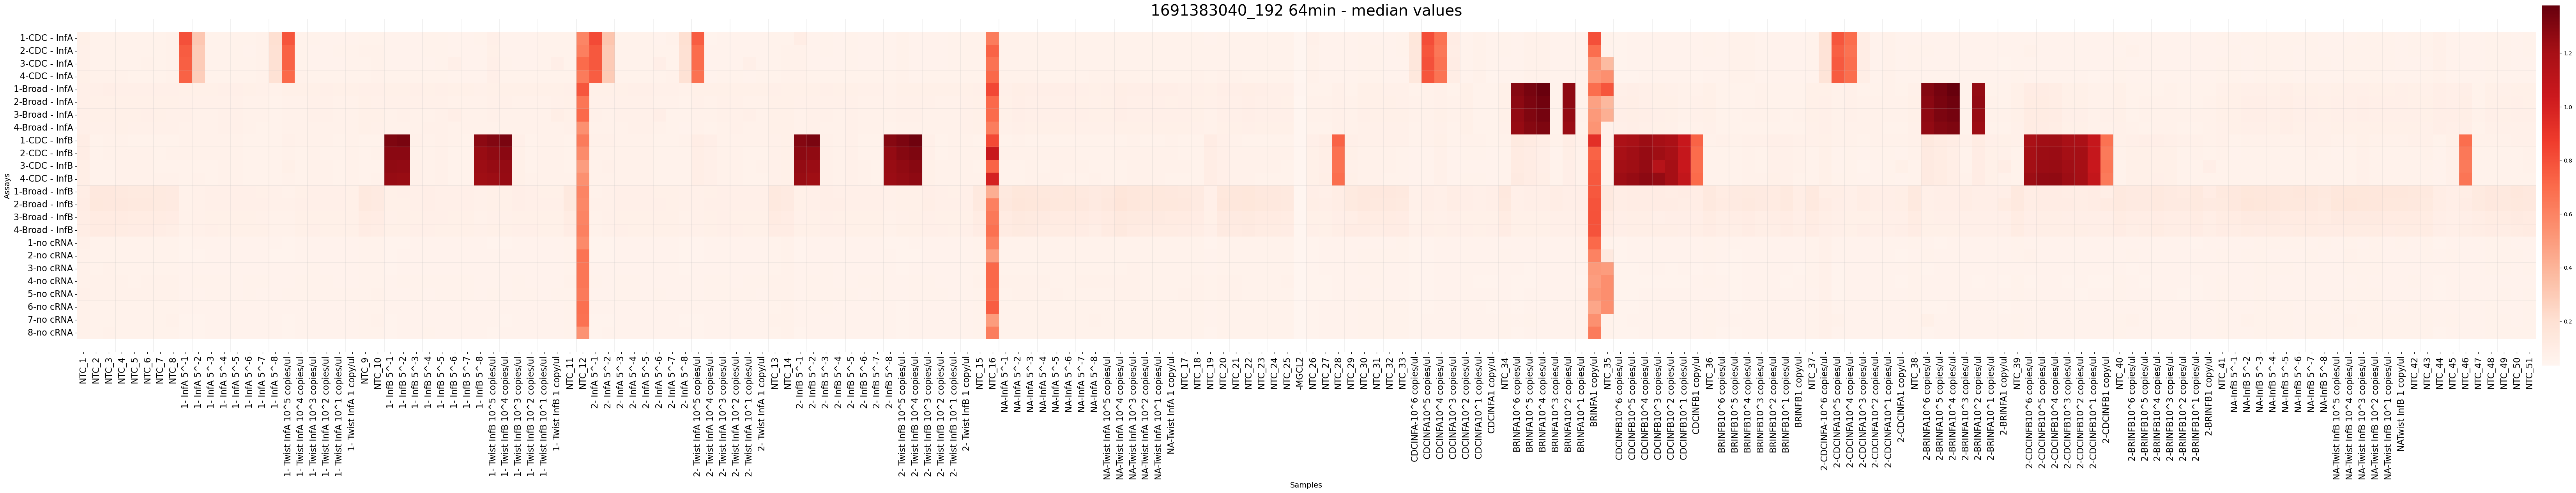

In [56]:
plt_heatmap(med_frames, sample_list, assay_list, 't13') 

# My Plotly Trial

In [134]:
import plotly.graph_objects as go

fig = go.Figure(go.Heatmap(
    x=med_frames[tp][sample_list].reindex(assay_list).columns.tolist(),
    y=med_frames[tp][sample_list].reindex(assay_list).index.tolist(),
    z=med_frames[tp][sample_list].reindex(assay_list),
    colorbar=dict(y=0.5, len=1)))

fig.update_layout(
    yaxis=dict(tickmode='linear', tick0=1, dtick=1, autorange='reversed'),
    xaxis=dict(tickmode='linear'),
    xaxis_title='Samples',
    yaxis_title='Assays',
    title_text=f'{exp_name} {str(rt)}min - median values', title_x=0.95, title_y=0.8,
    autosize=False,
    width=2700,
    height=700,
    margin=dict(l=50, r=50, b=50, t=175, pad=5)
) 

# Add annotationd
details = {
    # Set the cordinate
    'x': 0.0,
    'y': 1.50,
    'xref': 'paper',
    'yref': 'paper',
    'xanchor': 'auto',
    'yanchor': 'top',

    # Set format for text and box
    'text': f'Layout File Read: {layout_file} <br> CSV File Read: {csv_file} <br> Output Files: {signal_out_csv_1}, {signal_out_csv_2}, and {exp_name}_{instrument_type}_merged.tsv.gz <br> Arguments: python 192_96_python_FAM.py --fcount {fcount} --chip-dim {ifc} --in-csv {csv_file} --in-layout {layout_file} --timepoints {count_tp} --out-dir {out_folder} <br> Any other info you want to display?',
    'font': {'size': 20, 'color': 'black'},
    'showarrow': False
}

# Update the fig with annotations
fig.update_layout({'annotations': [details]})
fig.write_html(f'{out_folder}/{exp_name}_{instrument_type}_merged.html')

In [58]:
#get all the column names, then wherever there is an NTC add a number to it (NTC1, 
#NTC2 etc or append an empty string to it NTC' ' NTC' ' etc) maybe use arange 

In [59]:
ntc = med_frames[tp][sample_list].reindex(assay_list).columns == 'NTC'
med_frames[tp][sample_list].reindex(assay_list).columns[ntc]

Index([], dtype='object', name='')

In [60]:
import itertools


initial_cols = med_frames[tp][sample_list].reindex(assay_list).columns

def to_plotly_cols(i_cols):
    cycle_iter = itertools.cycle(range(1,len(sample_list)))
    new_plotly_cols = []
    for i in  i_cols:
        if i == 'NTC':
            #print(i + str(next(cycle_iter)))
            new_plotly_cols.append(i + str(next(cycle_iter))) 
        else :
            #print(i)
            new_plotly_cols.append(i)
    return new_plotly_cols

In [61]:
initial_cols

Index(['NTC_1', 'NTC_2', 'NTC_3', 'NTC_4', 'NTC_5', 'NTC_6', 'NTC_7', 'NTC_8',
       '1- InfA 5^-1', '1- InfA 5^-2',
       ...
       'NTC_42', 'NTC_43', 'NTC_44', 'NTC_45', 'NTC_46', 'NTC_47', 'NTC_48',
       'NTC_49', 'NTC_50', 'NTC_51'],
      dtype='object', name='', length=192)

In [62]:
new_plotly_cols = to_plotly_cols(initial_cols)
#print(new_plotly_cols)
med_frames[tp][sample_list].columns = new_plotly_cols
print(med_frames[tp].columns)

Index(['-MGCL2', '1- InfA 5^-1', '1- InfA 5^-2', '1- InfA 5^-3',
       '1- InfA 5^-4', '1- InfA 5^-5', '1- InfA 5^-6', '1- InfA 5^-7',
       '1- InfA 5^-8', '1- InfB 5^-1',
       ...
       'NTC_47', 'NTC_48', 'NTC_49', 'NTC_5', 'NTC_50', 'NTC_51', 'NTC_6',
       'NTC_7', 'NTC_8', 'NTC_9'],
      dtype='object', name='', length=192)


In [63]:
type(med_frames[tp][sample_list])

pandas.core.frame.DataFrame

In [64]:
sample_list

['NTC_1',
 'NTC_2',
 'NTC_3',
 'NTC_4',
 'NTC_5',
 'NTC_6',
 'NTC_7',
 'NTC_8',
 '1- InfA 5^-1',
 '1- InfA 5^-2',
 '1- InfA 5^-3',
 '1- InfA 5^-4',
 '1- InfA 5^-5',
 '1- InfA 5^-6',
 '1- InfA 5^-7',
 '1- InfA 5^-8',
 '1- Twist InfA 10^5 copies/ul',
 '1- Twist InfA 10^4 copies/ul',
 '1- Twist InfA 10^3 copies/ul',
 '1- Twist InfA 10^2 copies/ul',
 '1- Twist InfA 10^1 copies/ul',
 '1- Twist InfA 1 copy/ul',
 'NTC_9',
 'NTC_10',
 '1- InfB 5^-1',
 '1- InfB 5^-2',
 '1- InfB 5^-3',
 '1- InfB 5^-4',
 '1- InfB 5^-5',
 '1- InfB 5^-6',
 '1- InfB 5^-7',
 '1- InfB 5^-8',
 '1- Twist InfB 10^5 copies/ul',
 '1- Twist InfB 10^4 copies/ul',
 '1- Twist InfB 10^3 copies/ul',
 '1- Twist InfB 10^2 copies/ul',
 '1- Twist InfB 10^1 copies/ul',
 '1- Twist InfB 1 copy/ul',
 'NTC_11',
 'NTC_12',
 '2- InfA 5^-1',
 '2- InfA 5^-2',
 '2- InfA 5^-3',
 '2- InfA 5^-4',
 '2- InfA 5^-5',
 '2- InfA 5^-6',
 '2- InfA 5^-7',
 '2- InfA 5^-8',
 '2- Twist InfA 10^5 copies/ul',
 '2- Twist InfA 10^4 copies/ul',
 '2- Twist InfA 1

In [65]:
med_frames[tp][sample_list].index

Index(['1-Broad - InfA', '1-Broad - InfB', '1-CDC - InfA', '1-CDC - InfB',
       '1-no cRNA', '2-Broad - InfA', '2-Broad - InfB', '2-CDC - InfA',
       '2-CDC - InfB', '2-no cRNA', '3-Broad - InfA', '3-Broad - InfB',
       '3-CDC - InfA', '3-CDC - InfB', '3-no cRNA', '4-Broad - InfA',
       '4-Broad - InfB', '4-CDC - InfA', '4-CDC - InfB', '4-no cRNA',
       '5-no cRNA', '6-no cRNA', '7-no cRNA', '8-no cRNA'],
      dtype='object', name='')

In [66]:
print(new_plotly_cols)

['NTC_1', 'NTC_2', 'NTC_3', 'NTC_4', 'NTC_5', 'NTC_6', 'NTC_7', 'NTC_8', '1- InfA 5^-1', '1- InfA 5^-2', '1- InfA 5^-3', '1- InfA 5^-4', '1- InfA 5^-5', '1- InfA 5^-6', '1- InfA 5^-7', '1- InfA 5^-8', '1- Twist InfA 10^5 copies/ul', '1- Twist InfA 10^4 copies/ul', '1- Twist InfA 10^3 copies/ul', '1- Twist InfA 10^2 copies/ul', '1- Twist InfA 10^1 copies/ul', '1- Twist InfA 1 copy/ul', 'NTC_9', 'NTC_10', '1- InfB 5^-1', '1- InfB 5^-2', '1- InfB 5^-3', '1- InfB 5^-4', '1- InfB 5^-5', '1- InfB 5^-6', '1- InfB 5^-7', '1- InfB 5^-8', '1- Twist InfB 10^5 copies/ul', '1- Twist InfB 10^4 copies/ul', '1- Twist InfB 10^3 copies/ul', '1- Twist InfB 10^2 copies/ul', '1- Twist InfB 10^1 copies/ul', '1- Twist InfB 1 copy/ul', 'NTC_11', 'NTC_12', '2- InfA 5^-1', '2- InfA 5^-2', '2- InfA 5^-3', '2- InfA 5^-4', '2- InfA 5^-5', '2- InfA 5^-6', '2- InfA 5^-7', '2- InfA 5^-8', '2- Twist InfA 10^5 copies/ul', '2- Twist InfA 10^4 copies/ul', '2- Twist InfA 10^3 copies/ul', '2- Twist InfA 10^2 copies/ul', '2

In [67]:
med_frames[tp].columns

Index(['-MGCL2', '1- InfA 5^-1', '1- InfA 5^-2', '1- InfA 5^-3',
       '1- InfA 5^-4', '1- InfA 5^-5', '1- InfA 5^-6', '1- InfA 5^-7',
       '1- InfA 5^-8', '1- InfB 5^-1',
       ...
       'NTC_47', 'NTC_48', 'NTC_49', 'NTC_5', 'NTC_50', 'NTC_51', 'NTC_6',
       'NTC_7', 'NTC_8', 'NTC_9'],
      dtype='object', name='', length=192)

In [68]:
med_frames[tp][new_plotly_cols]

,NTC_1,NTC_2,NTC_3,NTC_4,NTC_5,NTC_6,NTC_7,NTC_8,1- InfA 5^-1,1- InfA 5^-2,...,NTC_42,NTC_43,NTC_44,NTC_45,NTC_46,NTC_47,NTC_48,NTC_49,NTC_50,NTC_51
,,,,,,,,,,,,,,,,,,,,,
1-Broad - InfA,0.086501,0.085984,0.087576,0.087175,0.086185,0.085235,0.085026,0.082068,0.081661,0.078900,...,0.081577,0.075992,0.089038,0.087164,0.091051,0.065600,0.079493,0.076388,0.080374,0.080402
1-Broad - InfB,0.102362,0.137582,0.134800,0.132715,0.128262,0.128145,0.127083,0.120601,0.069516,0.072517,...,0.142036,0.133704,0.099921,0.089538,0.102286,0.124586,0.139552,0.133594,0.147299,0.139390
1-CDC - InfA,0.077679,0.063828,0.065297,0.065700,0.065832,0.064373,0.065282,0.067223,0.797100,0.316623,...,0.062110,0.061945,0.072119,0.057736,0.057945,0.058824,0.061736,0.061773,0.059817,0.062408
1-CDC - InfB,0.101577,0.064742,0.067520,0.067002,0.065684,0.065228,0.066226,0.064133,0.069038,0.068410,...,0.072532,0.073378,0.065529,0.079665,0.687771,0.069374,0.070172,0.070992,0.072199,0.074217
1-no cRNA,0.071987,0.063824,0.064808,0.065224,0.064673,0.064220,0.063889,0.065515,0.052695,0.056165,...,0.060109,0.061653,0.054375,0.057046,0.057598,0.058017,0.061851,0.062021,0.060889,0.060307
2-Broad - InfA,0.085499,0.081075,0.080171,0.081083,0.077524,0.080335,0.079491,0.078673,0.074508,0.071712,...,0.081408,0.079958,0.092341,0.087069,0.092612,0.066048,0.081838,0.077353,0.083663,0.081424
2-Broad - InfB,0.104501,0.141149,0.138625,0.136853,0.130501,0.130343,0.127311,0.119546,0.069986,0.074992,...,0.137440,0.128797,0.099787,0.091393,0.103067,0.125653,0.137979,0.129479,0.144397,0.138684
2-CDC - InfA,0.075939,0.063580,0.066151,0.066190,0.065847,0.064131,0.064983,0.068747,0.754443,0.292917,...,0.061681,0.061269,0.072835,0.058386,0.058110,0.058506,0.062211,0.062560,0.059065,0.062271
2-CDC - InfB,0.097850,0.065688,0.067158,0.066917,0.066833,0.066568,0.065730,0.066333,0.066976,0.067561,...,0.066015,0.066718,0.059334,0.074105,0.645807,0.062015,0.063783,0.064455,0.065327,0.069870


In [69]:
med_frames[tp][sample_list].rename(index=to_plotly_cols(), axis='columns')

TypeError: to_plotly_cols() missing 1 required positional argument: 'i_cols'

In [ ]:
import itertools


initial_cols = med_frames[tp][sample_list].reindex(assay_list).columns

def to_plotly_cols(i_cols):
    cycle_iter = itertools.cycle(range(1,len(sample_list)))
    new_plotly_cols = []
    for i in  i_cols:
        if i == 'NTC':
            #print(i + str(next(cycle_iter)))
            new_plotly_cols.append(i + str(next(cycle_iter))) 
        else :
            #print(i)
            new_plotly_cols.append(i)
    return new_plotly_cols

In [ ]:
samples = pd.read_excel(path.join('',layout_file),sheet_name='samples', engine='openpyxl')
#print(samples)

c = 1
def append_num_to_ntc(x):
    global c
    if x == 'NTC':
        x = f"{x}_{c}"
        c += 1
    return x

samples = samples.applymap(lambda x: append_num_to_ntc(x))
print(samples)